# Quantitative Analyst Intern - Assignment

Manav Shah

In [3]:
import requests
import json
import numpy as np
import pandas as pd

In [4]:
query = """query trades{
  swaps(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, orderBy: timestamp, orderDirection: desc) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    pair{
    token0{
        symbol
        name
    }
    token1{
        symbol
        name
    }
    }
  }
}"""


In [5]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"swaps":[{"amount0In":"0","amount0Out":"1.12133738589306252","amount1In":"0.01","amount1Out":"0","id":"0xe803a5a6de7a39aeb139ef0839a3e6bfd754e2bee6fcd93d645362f16c80b57e-0","pair":{"token0":{"name":"Uniswap","symbol":"UNI"},"token1":{"name":"Wrapped Ether","symbol":"WETH"}},"timestamp":"1624617123"},{"amount0In":"0","amount0Out":"3.59023534090882047","amount1In":"0.032017375","amount1Out":"0","id":"0x00b87a05de4ebd7a8cfa3e781c437d29457655694746052eabe1b02406c067d8-0","pair":{"token0":{"name":"Uniswap","symbol":"UNI"},"token1":{"name":"Wrapped Ether","symbol":"WETH"}},"timestamp":"1624617080"},{"amount0In":"0","amount0Out":"32.944418300758644732","amount1In":"0.293790481621263808","amount1Out":"0","id":"0x43087b7d0b0c43520aa08d63a78ef0fe41a66d9f3d45c9b49862bc630fc84c6d-0","pair":{"token0":{"name":"Uniswap","symbol":"UNI"},"token1":{"name":"Wrapped Ether","symbol":"WETH"}},"timestamp":"1624616368"},{"amount0In":"0","amount0Out":"602.358575110900329292","amount1In":"5.3702006

In [6]:
json_data = json.loads(r.text)
raw_data = json_data['data']['swaps']
df_data = []
for swap in raw_data:
    s = []
    s.append(int(swap['timestamp']))
    if float(swap['amount0In'])==0:
        s.append('Buy')
        s.append(float(swap['amount1In']))
        s.append(float(swap['amount0Out']))
    else:
        s.append('Sell')
        s.append(float(swap['amount0In']))
        s.append(float(swap['amount1Out']))
    s.append(swap['id'])
    df_data.append(s)      
df = pd.DataFrame(df_data,columns=['Timestamp','Side','Base currency traded quantity','Quote currency traded quantity','id'])
df['Timestamp'] = pd.to_datetime(df['Timestamp']*(10**9))
# pd.options.display.float_format = "{:,.2f}".format
df=df.set_index('Timestamp')
print(df.head())

                    Side  Base currency traded quantity  \
Timestamp                                                 
2021-06-25 10:32:03  Buy                       0.010000   
2021-06-25 10:31:20  Buy                       0.032017   
2021-06-25 10:19:28  Buy                       0.293790   
2021-06-25 10:15:40  Buy                       5.370201   
2021-06-25 10:15:32  Buy                       5.235475   

                     Quote currency traded quantity  \
Timestamp                                             
2021-06-25 10:32:03                        1.121337   
2021-06-25 10:31:20                        3.590235   
2021-06-25 10:19:28                       32.944418   
2021-06-25 10:15:40                      602.358575   
2021-06-25 10:15:32                      587.551504   

                                                                    id  
Timestamp                                                               
2021-06-25 10:32:03  0xe803a5a6de7a39aeb139ef0839a3e6b

In [7]:
df.to_csv('Trades.csv')

In [9]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
data = []
n = 5
for i in range(7*n):
    time = 18800-i
    query1 = """query trades{
      pairDayData(id:"0xd3d2e2692501a5c9ca623199d38826e513033a17-%d"){
        date
        reserve0
        reserve1
        reserveUSD
        dailyVolumeToken0
        dailyVolumeToken1
        dailyVolumeUSD
      }
    }
    """%(time)
    
    r = requests.post(url, json={'query': query1})
    # print(r.status_code)
    # print(r.text)
    json_data = json.loads(r.text)
    raw_data = json_data['data']['pairDayData']
    data.append([float(x) for x in raw_data.values()])    
    
data = pd.DataFrame(data,columns=['Daily Volume UNI','Daily Volume WETH','Total Daily Volume USD','Date','Liquidity UNI','Liquidity WETH','Total Liquidity USD'])
data['Date'] = pd.to_datetime(data['Date']*(10**9))
data = data.set_index('Date')
print(data)

            Daily Volume UNI  Daily Volume WETH  Total Daily Volume USD  \
Date                                                                      
2021-06-22      5.794627e+05        4810.552512            8.951466e+06   
2021-06-21      2.364962e+05        2089.162714            4.113164e+06   
2021-06-20      1.539834e+05        1414.664424            3.039116e+06   
2021-06-19      4.359891e+04         400.306602            8.900604e+05   
2021-06-18      1.250001e+05        1160.146214            2.626560e+06   
2021-06-17      6.787459e+04         631.132524            1.506215e+06   
2021-06-16      9.373749e+04         857.107447            2.114177e+06   
2021-06-15      5.023327e+04         465.269611            1.202451e+06   
2021-06-14      9.642804e+04         892.307956            2.265819e+06   
2021-06-13      1.792439e+05        1617.493904            3.902117e+06   
2021-06-12      1.711072e+05        1537.298303            3.608829e+06   
2021-06-11      1.745679e

Visualisations

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

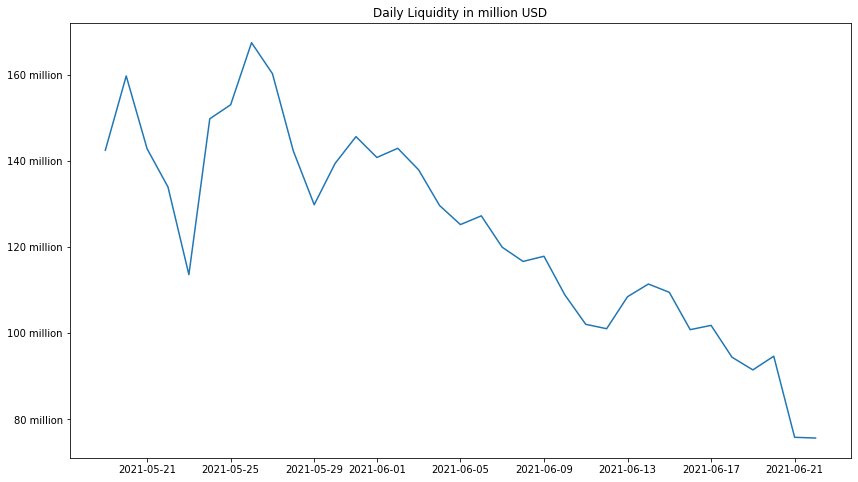

In [10]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,-1])

def y_format(x,y):
    return '{} million'.format(int(x/(10**6)))

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Daily Liquidity in million USD')
plt.show()

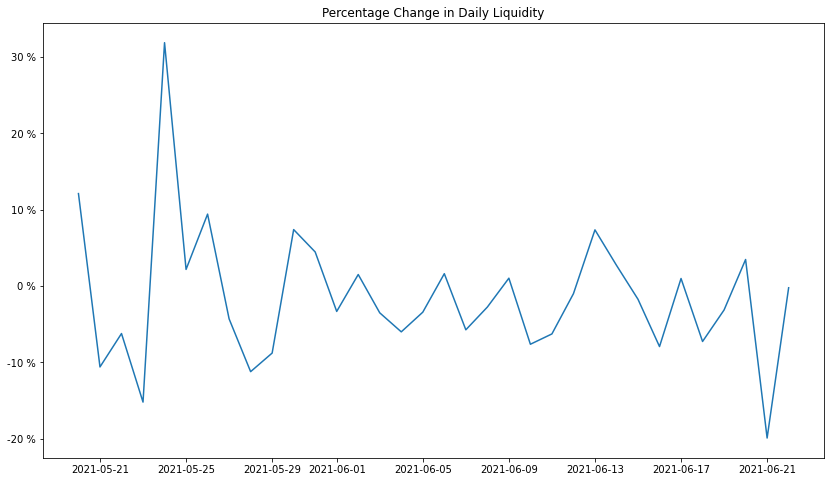

In [21]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,-1].pct_change())

def y_format(x,y):
    return '{:.0f} %'.format(x*100)

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Percentage Change in Daily Liquidity')
plt.show()

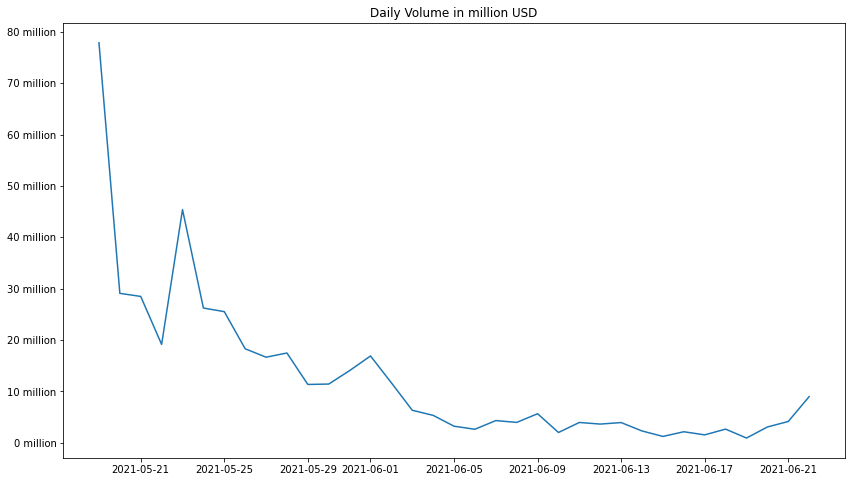

In [20]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,2])

def y_format(x,y):
    return '{} million'.format(int(x/(10**6)))

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Daily Volume in million USD')
plt.show()

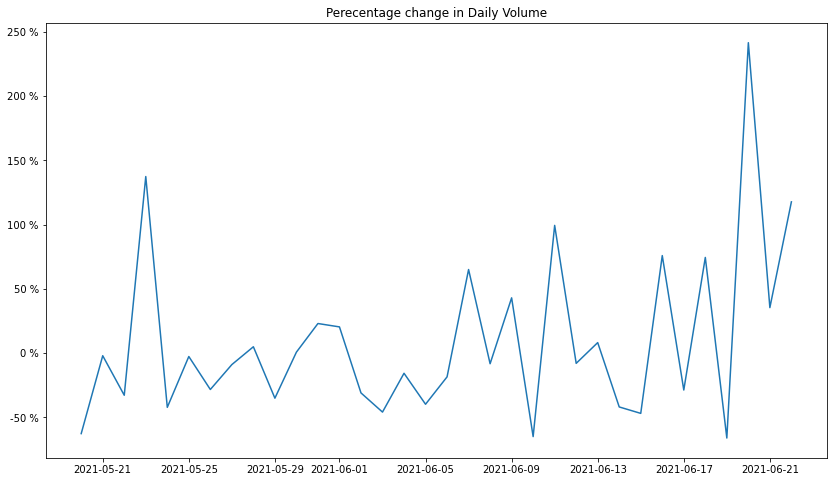

In [22]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,2].pct_change())

def y_format(x,y):
    return '{:.0f} %'.format(x*100)

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Perecentage change in Daily Volume')
plt.show()

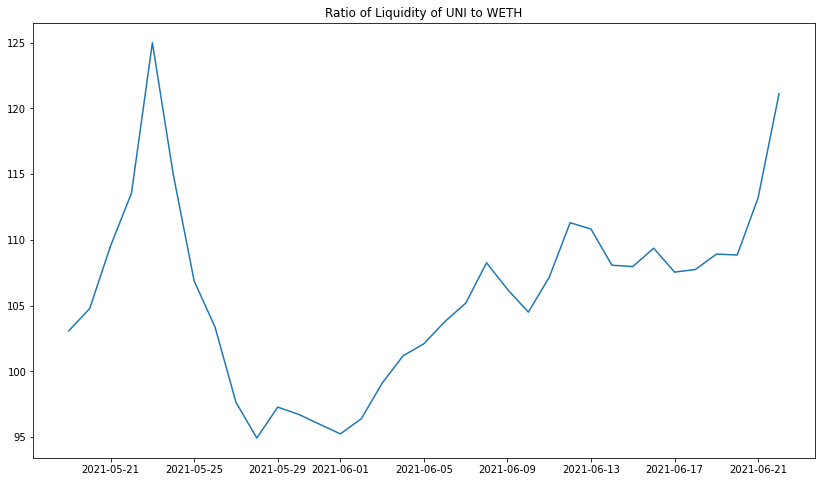

In [150]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,0]/data.iloc[::-1,1])

plt.title('Ratio of Liquidity of UNI to WETH')
plt.show()

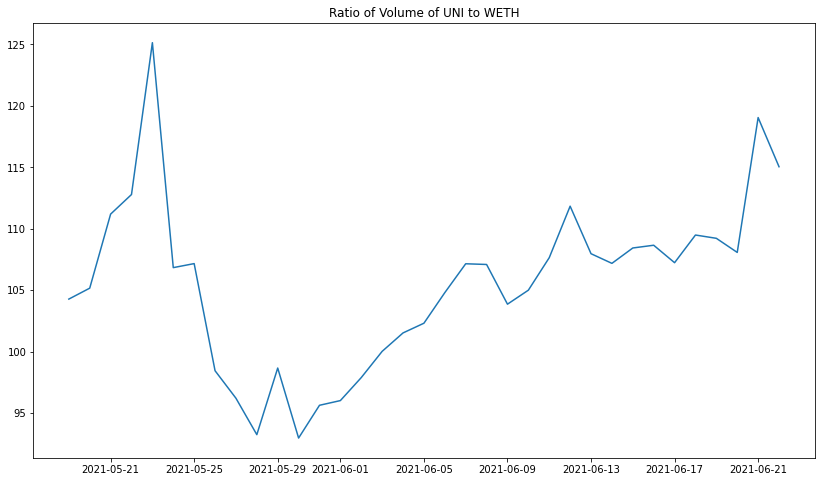

In [165]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,3]/data.iloc[::-1,4])

plt.title('Ratio of Volume of UNI to WETH')
plt.show()

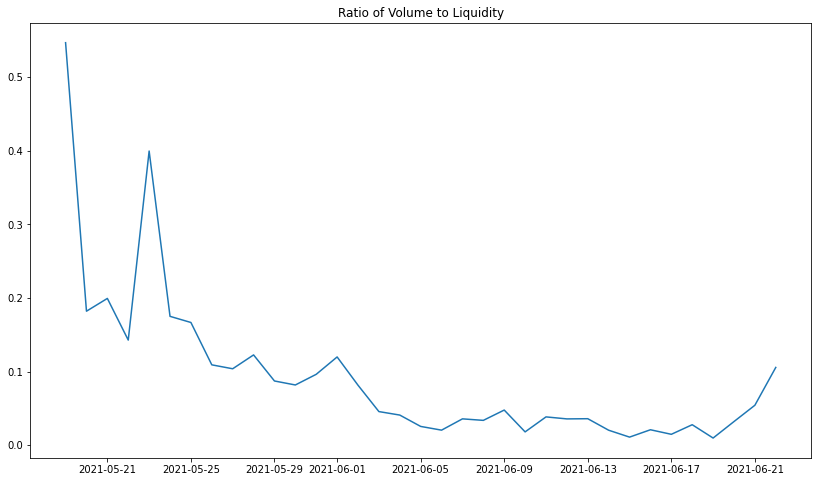

In [168]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,2]/data.iloc[::-1,-1])

plt.title('Ratio of Volume to Liquidity')
plt.show()

Inferences